# LIS Data Visualization
- Data provided by sujay group
- In ADAPT Data is located at `/att/pubrepo/hma_data/products/LIS/SURFACEMODEL/`

4/27/2016
- Arendt:
    - example data in this repo: `C:\work\datadrive\LIS\*.nc`
- Don: 
    - example data in this repo: `/Users/lsetiawan/Downloads/200101/*.nc`
    - made some cleanups in notebook

In [1]:
# Import the necessary libraries
%matplotlib inline
import os
import sys

import seaborn as sb

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

sys.path.append('../../scripts/')
from LIS import utils

In [2]:
# Arendt path
# datadir = r'C:\work\datadrive\LIS\'
# Don path
datadir = r'/Users/lsetiawan/Downloads/200101/'

In [3]:
# To open multiple netCDF files at once
# ds = utils.get_xr_dataset(datadir, multiple_nc=True)
# Open only one dataset
fname = 'LIS_HIST_200101010000.d01.nc'
ds = utils.get_xr_dataset(datadir, fname)

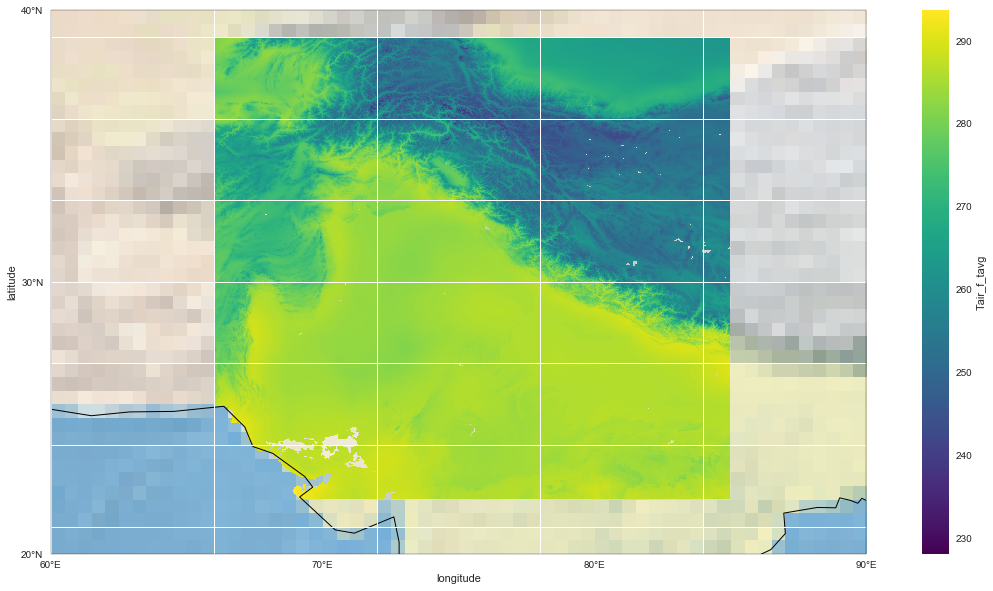

In [4]:
# Set up cartopy axes
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.stock_img()
ax.gridlines()
ax.coastlines()
ax.set_ylim([20,40])
ax.set_xlim([60,90])
ax.set_yticks([20, 30, 40], crs=ccrs.PlateCarree())
ax.set_xticks([60, 70, 80, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the data of first timestamp only (This is for multiple data)
# fig = ds.Tair_f_tavg[1,:,:].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='longitude', y='latitude', add_colorbar=True)

# Plot the data of one variable
ds.Tair_f_tavg.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='longitude', y='latitude', add_colorbar=True)